In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as rp
import gmaps
from config import gkey
import scipy.stats as stats

In [2]:
base = "http://ufo-api.herokuapp.com/api/sightings/location/near?"
Ontario_lat_max = 56.800878
Ontario_lat_min = 41.771312
Ontario_lng_max = -75.251467
Ontario_lng_min = -95.281572

lats = np.random.uniform(low=-90, high=90, size=200)
lngs = np.random.uniform(low=-90, high=90, size=200)


In [3]:
len(lats), len(lngs)

(2000, 2000)

In [4]:
city = []
shape = []
state = []
date = []
duration = []
lats_ON = []
lngs_ON = []
for i in np.arange(0,len(lats)):
    try:
        responce = rp.get(f"{base}lat={lats[i]}&lon={lngs[i]}&limit=1").json()
#         if responce["sightings"][0]["obj"]["state"] == "ON":
        city.append(responce["sightings"][0]["obj"]["city"])
        shape.append(responce["sightings"][0]["obj"]["shape"])
        state.append(responce["sightings"][0]["obj"]["state"])
        date.append(responce["sightings"][0]["obj"]["date"])
        duration.append(responce["sightings"][0]["obj"]["duration"])
        lats_ON.append(responce["sightings"][0]["obj"]["loc"][1])
        lngs_ON.append(responce["sightings"][0]["obj"]["loc"][0])
    except Exception as e:
        print("could not find")
print("finished")

could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not find
could not 

In [5]:
Combined = pd.DataFrame({"lat":lats_ON,"lng":lngs_ON,"city":city,"shape":shape,"state":state,"date":date,"duration":duration})
cities_strength = Combined.groupby("city").count()
cities_strength = cities_strength.reset_index()
Combined = Combined.drop_duplicates("city")
cities_strength.set_index("city",inplace = True)
cities_strength = pd.DataFrame(cities_strength.loc[Combined["city"],"lat"])
cities_strength.reset_index(inplace = True)
cities_strength.rename(columns = {"lat":"strength"},inplace=True)
cities_strength["Normalised"] = (cities_strength["strength"]/cities_strength["strength"].sum())*100
Combined = pd.merge(Combined,cities_strength,on="city")
Combined.head()

,lat,lng,city,shape,state,date,duration,strength,Normalised
0,-10.000000,70.000000,Indian Ocean,Fireball,,2010-10-29T21:00:00.000Z,1.5 hrs,31,1.657754
1,28.060197,-16.731053,Playa de las Americas (Spain),Cigar,,2008-06-13T13:00:00.000Z,1 second max,2,0.106952
2,-14.016710,-70.444436,Tocca,Triangle,GA,1984-12-24T23:15:00.000Z,3 min,3,0.160428
3,77.619235,-42.812597,Greenland,Rectangle,,2009-10-10T00:00:00.000Z,,53,2.834225
4,32.940750,52.947134,Iran,Other,,2016-03-23T12:00:00.000Z,1 second,1,0.053476


In [6]:
gkey = ""
gmaps.configure(api_key=gkey)
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [7]:

coordinates = Combined[["lat","lng"]]
# coordinates
# markers = gmaps.marker_layer(coordinates)
# # Add the layer to the map
# fig.add_layer(markers)
# fig
# Combined[Combined["lat"]<=-50]

In [8]:

heat_layer = gmaps.heatmap_layer(coordinates, weights=Combined["strength"], 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1.0)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 1000
heat_layer.point_radius = 5

fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

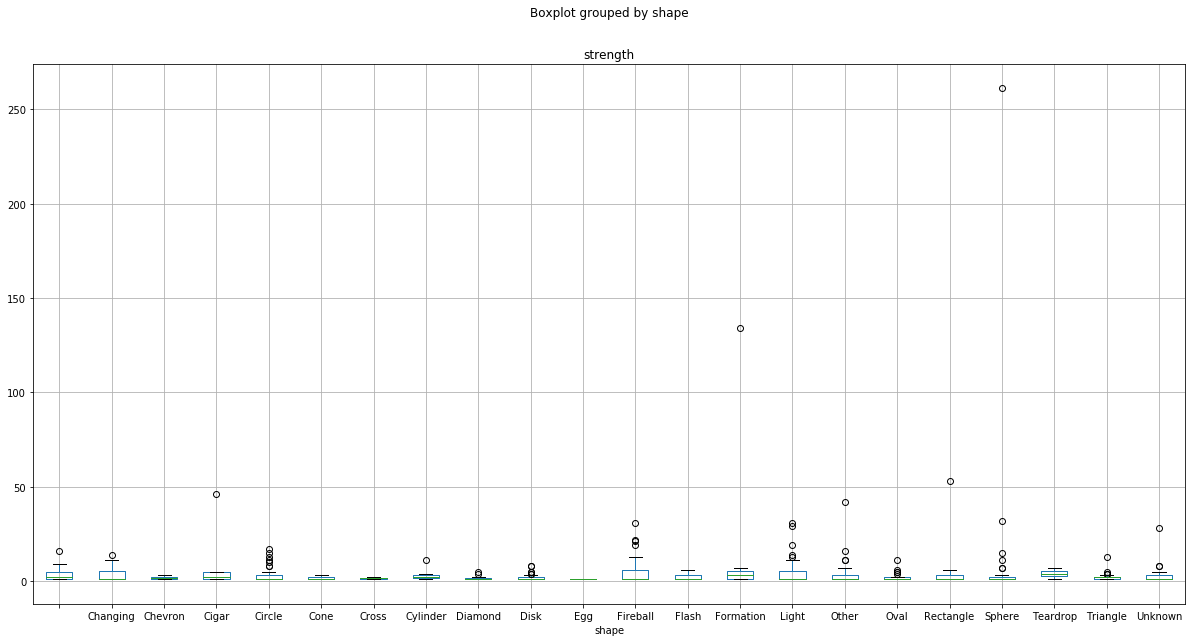

In [9]:
Combined.boxplot("strength", by="shape", figsize=(20, 10))

(array([0.40064103, 0.08012821, 0.03205128, 0.        , 0.03205128,
        0.01602564, 0.01602564, 0.01602564, 0.01602564, 0.01602564]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <a list of 10 Patch objects>)

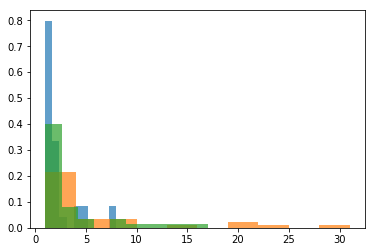

In [10]:
Combined[Combined["shape"]=="Disk"]["strength"]
plt.hist(Combined[Combined["shape"]=="Disk"]["strength"], 10, density=True, alpha=0.7, label="population1")
plt.hist(Combined[Combined["shape"]=="Fireball"]["strength"], 10, density=True, alpha=0.7, label="population1")
plt.hist(Combined[Combined["shape"]=="Circle"]["strength"], 10, density=True, alpha=0.7, label="population1")
# plt.hist(Combined[Combined["shape"]=="Egg"]["strength"], 10, density=True, alpha=0.7, label="population1")

In [11]:
stats.f_oneway(Combined[Combined["shape"]=="Disk"]["strength"],Combined[Combined["shape"]=="Fireball"]["strength"],Combined[Combined["shape"]=="Egg"]["strength"])

F_onewayResult(statistic=3.359634553556709, pvalue=0.040880745142063364)

In [12]:
#cleaning combined dataframe based on date 
Combined['year'] = pd.DatetimeIndex(Combined['date']).year
Combined['month'] = pd.DatetimeIndex(Combined['date']).month
Combined.head()

,lat,lng,city,shape,state,date,duration,strength,Normalised,year,month
0,-10.000000,70.000000,Indian Ocean,Fireball,,2010-10-29T21:00:00.000Z,1.5 hrs,31,1.657754,2010,10
1,28.060197,-16.731053,Playa de las Americas (Spain),Cigar,,2008-06-13T13:00:00.000Z,1 second max,2,0.106952,2008,6
2,-14.016710,-70.444436,Tocca,Triangle,GA,1984-12-24T23:15:00.000Z,3 min,3,0.160428,1984,12
3,77.619235,-42.812597,Greenland,Rectangle,,2009-10-10T00:00:00.000Z,,53,2.834225,2009,10
4,32.940750,52.947134,Iran,Other,,2016-03-23T12:00:00.000Z,1 second,1,0.053476,2016,3


In [13]:
#new df
date_df = Combined[['city', 'year', 'month']].copy()
date_df.head()

,city,year,month
0,Indian Ocean,2010,10
1,Playa de las Americas (Spain),2008,6
2,Tocca,1984,12
3,Greenland,2009,10
4,Iran,2016,3
